In [1]:
import numpy as np 
import pandas as pd 

In [7]:
data = pd.read_csv('zomato_data.csv') 
data

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [30]:
data.isna().sum()

online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [32]:
data.isna().sum()/len(data)

online_order                 0.000000
book_table                   0.000000
rate                         0.150337
votes                        0.000000
rest_type                    0.004389
dish_liked                   0.542916
cuisines                     0.000870
approx_costfor_two_people    0.006690
listed_intype                0.000000
listed_incity                0.000000
dtype: float64

In [81]:
df = data.copy() 
df.head() 

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


## DATA CLEANING
**01. Rate Column** 

In [83]:
#  Replace '-' values with NaN
df['rate'] = df['rate'].replace('-', np.nan)

In [85]:
# Remove '/5' and retain only the numeric value
df['rate'] = df['rate'].str.replace('/5', '', regex=False)

In [87]:
# Convert to float using pd.to_numeric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [89]:
# Fill missing values using the median rating
df['rate'] = df['rate'].fillna(df['rate'].median())

**02. approx_costfor_two_people**

In [91]:
# Remove commas from numeric strings
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].str.replace(',', '', regex=False)

In [93]:
# Convert to numeric
df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')

In [95]:
# Fill missing values using the median cost
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].fillna(df['approx_costfor_two_people'].median())

In [97]:
df.isnull().sum()

online_order                     0
book_table                       0
rate                             0
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people        0
listed_intype                    0
listed_incity                    0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


**03. dish_linked, cuisines, rest_type**

In [101]:
# Replace NaN in dish_liked with "Not Available"
df['dish_liked'] = df['dish_liked'].fillna("Not Available")

In [103]:
# Replace NaN in cuisines with "Other"
df['cuisines'] = df['cuisines'].fillna("Other")

In [105]:
# Replace NaN in rest_type with "Unknown"
df['rest_type'] = df['rest_type'].fillna("Unknown")

In [107]:
df.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


**04. votes**

In [111]:
# Verifying no NaN values. 
print("NaN values in votes:", df['votes'].isna().sum())

# Count zero values
print("Zero values in votes:", (df['votes'] == 0).sum())

# Calculate median of non-zero votes
non_zero_votes = df[df['votes'] != 0]['votes']
median_votes = non_zero_votes.median()
print("Median of non-zero votes:", median_votes)

# Replace zero values with median
df.loc[df['votes'] == 0, 'votes'] = median_votes

NaN values in votes: 0
Zero values in votes: 10027
Median of non-zero votes: 73.0


In [113]:
# Verify changes
print("Zero values after imputation:", (df['votes'] == 0).sum())
print("NaN values after imputation:", df['votes'].isna().sum())

Zero values after imputation: 0
NaN values after imputation: 0


**05. online_order, book_table**

In [116]:
# Binary encoding for online_order: Yes → 1, No → 0
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

# Binary encoding for book_table: Yes → 1, No → 0
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [118]:
df

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,Bar,Not Available,Continental,1500.0,Pubs and bars,Whitefield
51713,0,0,3.7,73,Bar,Not Available,Finger Food,600.0,Pubs and bars,Whitefield
51714,0,0,3.7,73,Bar,Not Available,Finger Food,2000.0,Pubs and bars,Whitefield
51715,0,1,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [122]:
# Convert float to integer
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(int)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 3.7+ MB


In [130]:
df.isna().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

## EXPLORATORY DATA ANALYSIS 

In [133]:
df.describe() 

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,3.700362,297.850919,554.391689
std,0.492080,0.330379,0.395391,799.349158,437.563723
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,0.000000,0.000000,3.500000,29.000000,300.000000
50%,1.000000,0.000000,3.700000,73.000000,400.000000
75%,1.000000,0.000000,3.900000,198.000000,650.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [135]:
df.describe(include=['O']) 

,rest_type,dish_liked,cuisines,listed_intype,listed_incity
count,51717,51717,51717,51717,51717
unique,94,5272,2724,7,30
top,Quick Bites,Not Available,North Indian,Delivery,BTM
freq,19132,28078,2913,25942,3279


In [143]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [139]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

In [147]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


# Univariate Analysis
**01. NUMERICAL COLUMNS**

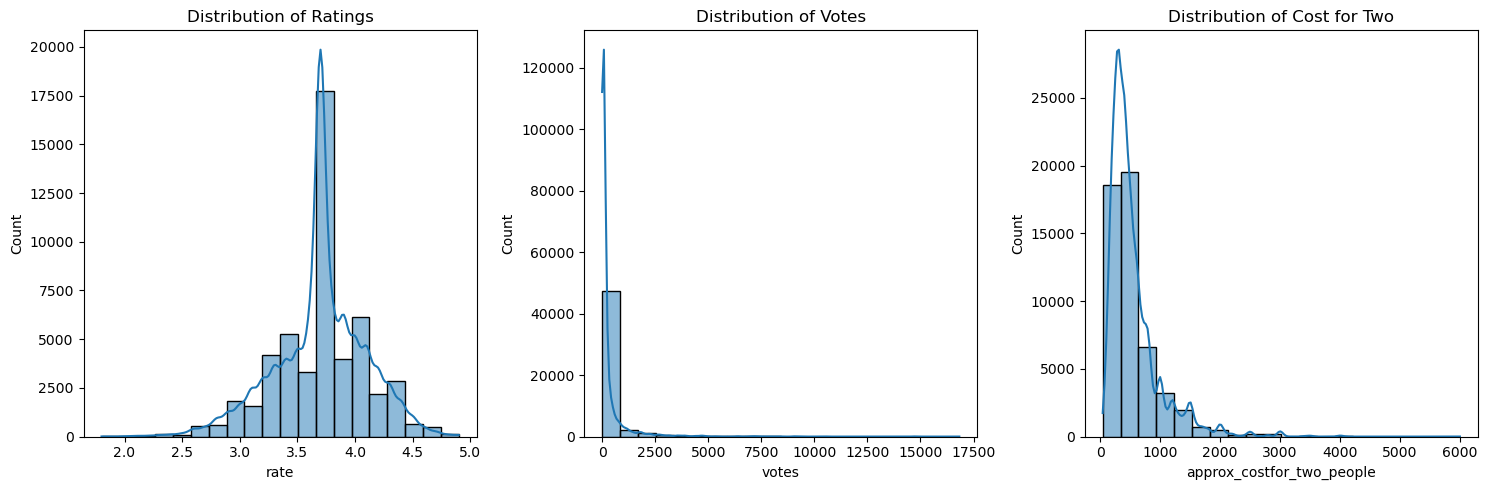

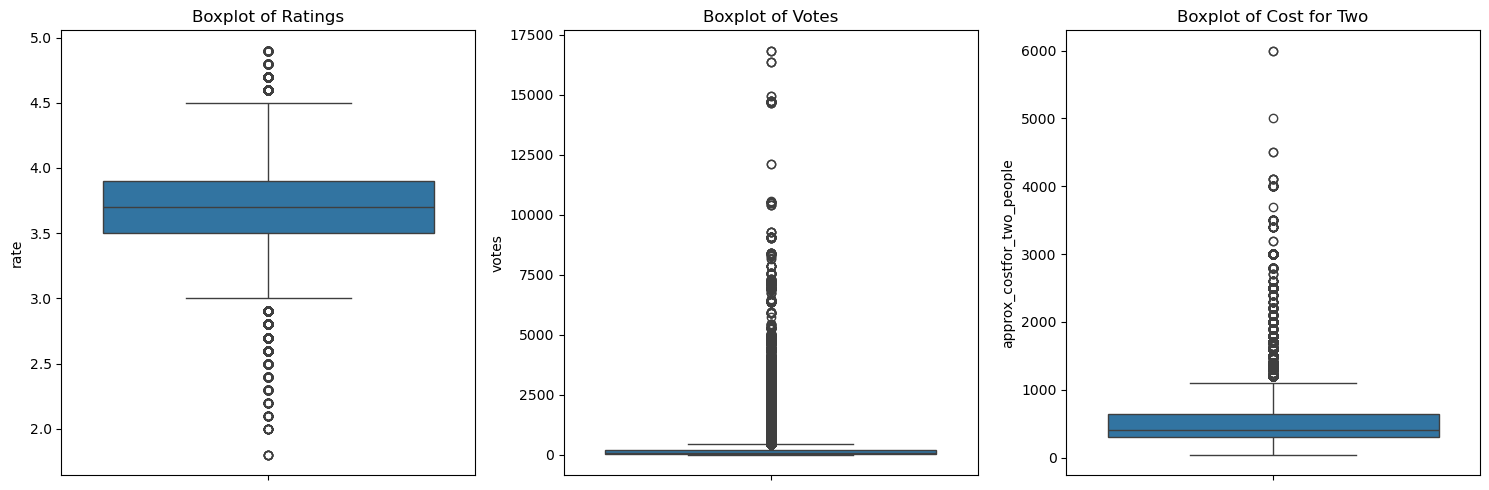

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 3, 2)
sns.histplot(df['votes'], bins=20, kde=True)
plt.title('Distribution of Votes')

plt.subplot(1, 3, 3)
sns.histplot(df['approx_costfor_two_people'], bins=20, kde=True)
plt.title('Distribution of Cost for Two')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['rate'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['votes'])
plt.title('Boxplot of Votes')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['approx_costfor_two_people'])
plt.title('Boxplot of Cost for Two')
plt.tight_layout()
plt.show()

In [212]:
# Verify no zero or negative values (for confirmation)
print("Minimum values before log transformation:")
print("rate:", df['rate'].min())
print("votes:", df['votes'].min())
print("approx_costfor_two_people:", df['approx_costfor_two_people'].min())

# Apply log transformation using np.log1p
df['log_rate'] = np.log1p(df['rate'])
df['log_votes'] = np.log1p(df['votes'])
df['log_cost'] = np.log1p(df['approx_costfor_two_people'])

# Verify new columns
print("\nSummary of log-transformed columns:")
print(df[['log_rate', 'log_votes', 'log_cost']].describe())

Minimum values before log transformation:
rate: 1.8
votes: 1
approx_costfor_two_people: 40

Summary of log-transformed columns:
           log_rate     log_votes      log_cost
count  51717.000000  51717.000000  51717.000000
mean       1.543977      4.405873      6.093902
std        0.086446      1.515967      0.652822
min        1.029619      0.693147      3.713572
25%        1.504077      3.401197      5.707110
50%        1.547563      4.304065      5.993961
75%        1.589235      5.293305      6.478510
max        1.774952      9.731097      8.699681


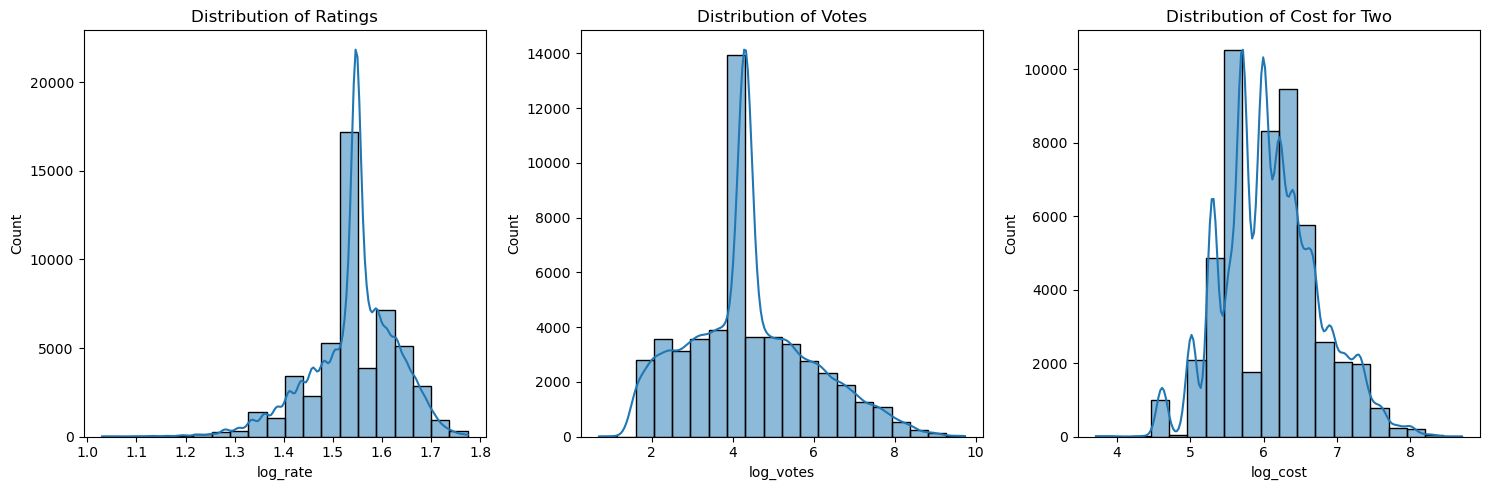

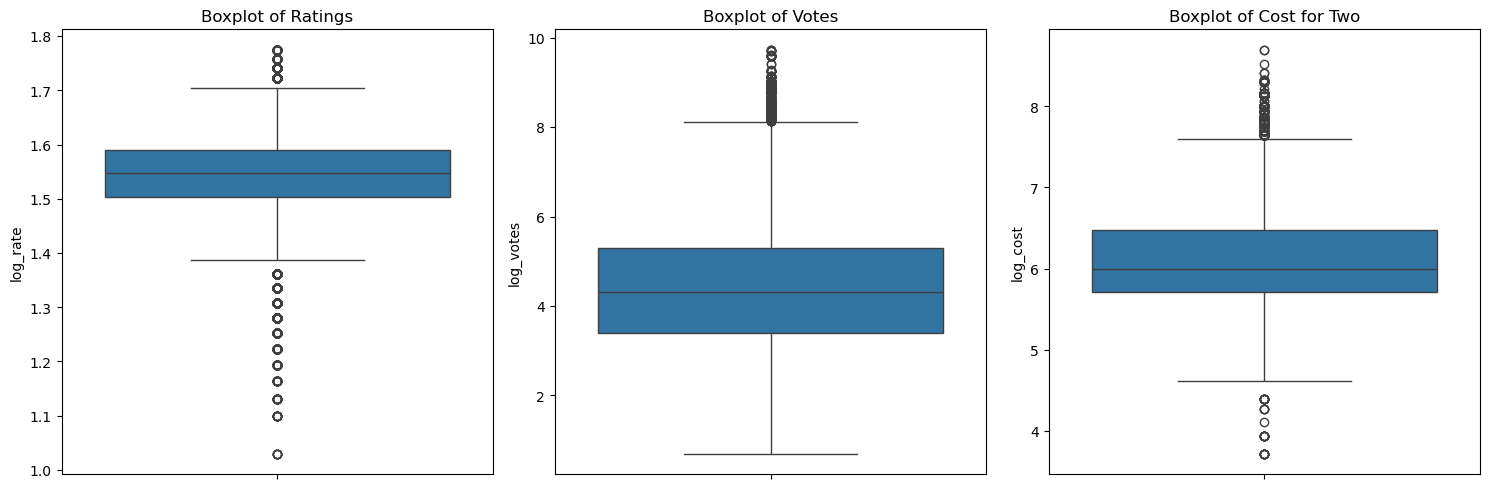

In [214]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['log_rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 3, 2)
sns.histplot(df['log_votes'], bins=20, kde=True)
plt.title('Distribution of Votes')

plt.subplot(1, 3, 3)
sns.histplot(df['log_cost'], bins=20, kde=True)
plt.title('Distribution of Cost for Two')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['log_rate'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['log_votes'])
plt.title('Boxplot of Votes')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['log_cost'])
plt.title('Boxplot of Cost for Two')
plt.tight_layout()
plt.show()

In [216]:
print(df['online_order'].value_counts(normalize=True))
print(df['book_table'].value_counts(normalize=True))

online_order
1    0.588665
0    0.411335
Name: proportion, dtype: float64
book_table
0    0.875302
1    0.124698
Name: proportion, dtype: float64


**CATEGORICAL COLUMNS**

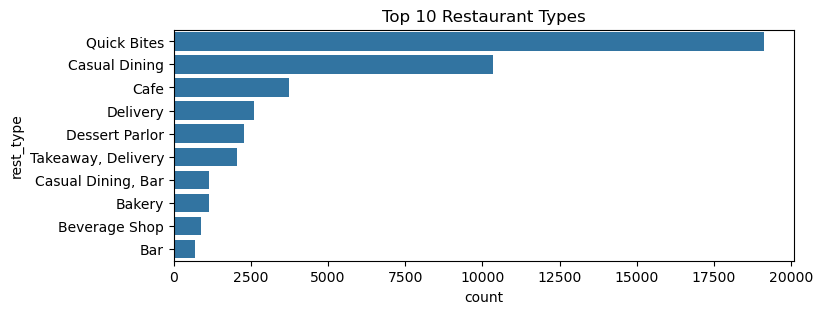

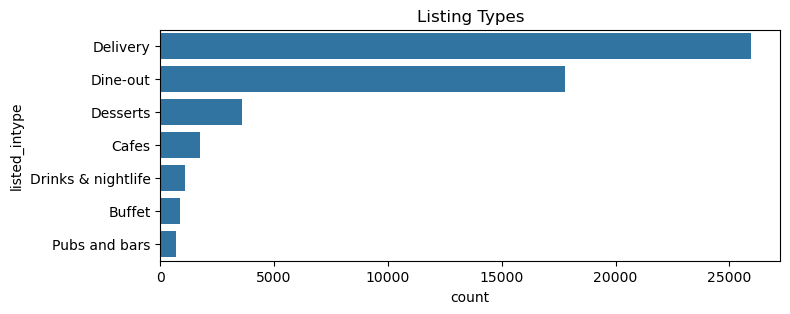

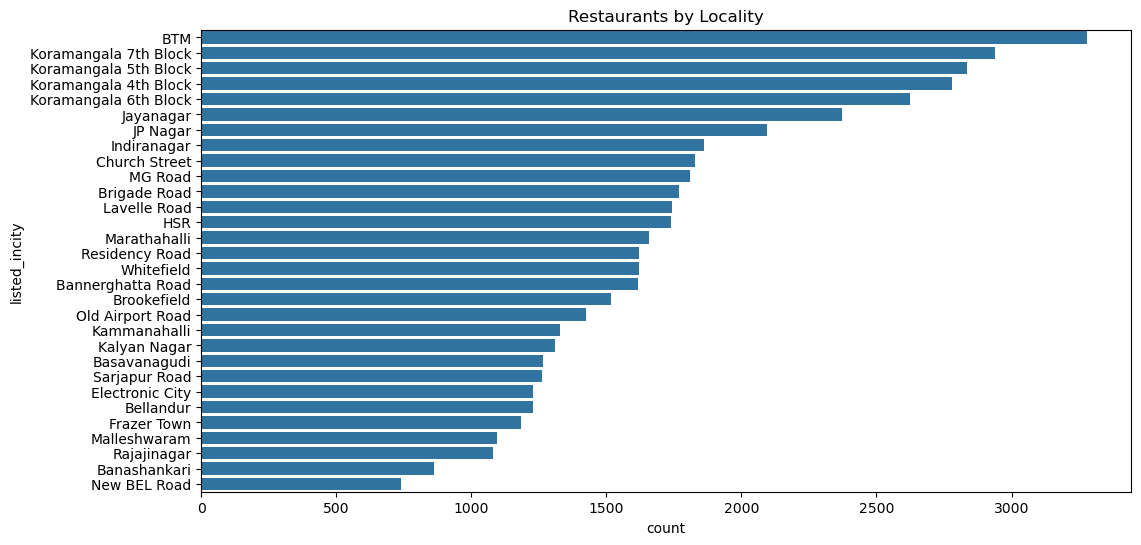

In [161]:
plt.figure(figsize=(8, 3))
sns.countplot(y=df['rest_type'], order=df['rest_type'].value_counts().index[:10])
plt.title('Top 10 Restaurant Types')
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(y=df['listed_intype'], order=df['listed_intype'].value_counts().index)
plt.title('Listing Types')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['listed_incity'], order=df['listed_incity'].value_counts().index)
plt.title('Restaurants by Locality')
plt.show()

**TEXT COLUMNS**

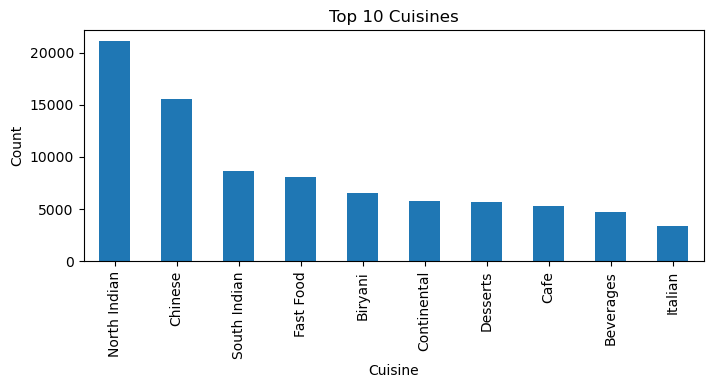

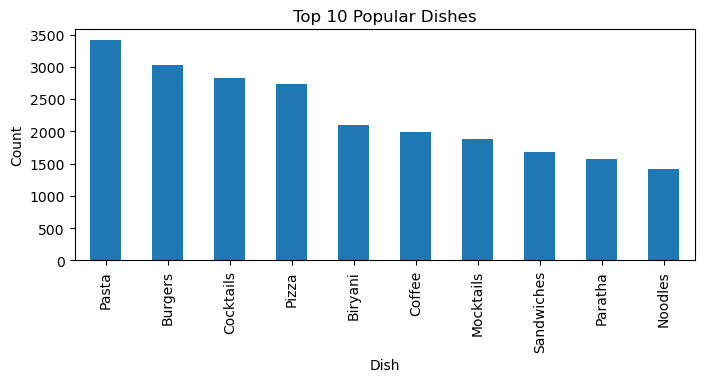

In [165]:
  # Top cuisines
  cuisines = df['cuisines'].str.split(', ', expand=True).stack().value_counts()
  plt.figure(figsize=(8, 3))
  cuisines[:10].plot(kind='bar')
  plt.title('Top 10 Cuisines')
  plt.xlabel('Cuisine')
  plt.ylabel('Count')
  plt.show()

  # Top dishes (excluding 'Not Available')
  dishes = df[df['dish_liked'] != 'Not Available']['dish_liked'].str.split(', ', expand=True).stack().value_counts()
  plt.figure(figsize=(8, 3))
  dishes[:10].plot(kind='bar')
  plt.title('Top 10 Popular Dishes')
  plt.xlabel('Dish')
  plt.ylabel('Count')
  plt.show()

**BINARY COLUMNS**

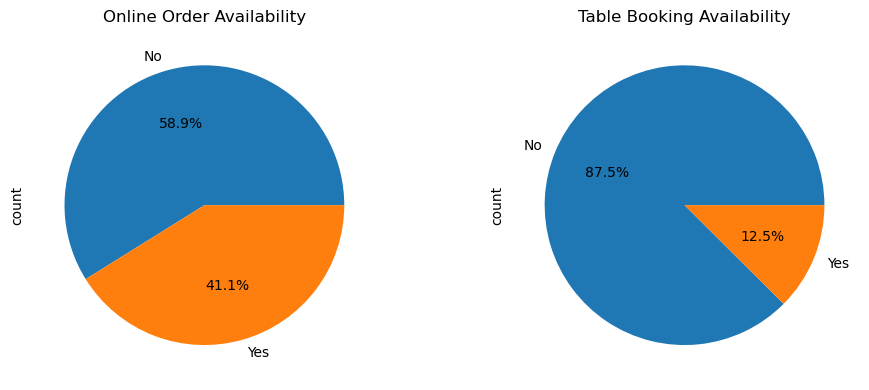

In [169]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['online_order'].value_counts().plot.pie(labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Online Order Availability')

plt.subplot(1, 2, 2)
df['book_table'].value_counts().plot.pie(labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Table Booking Availability')
plt.tight_layout()
plt.show()

## Bivariate / Multivariate Analysis
**Rating vs Other Variables**

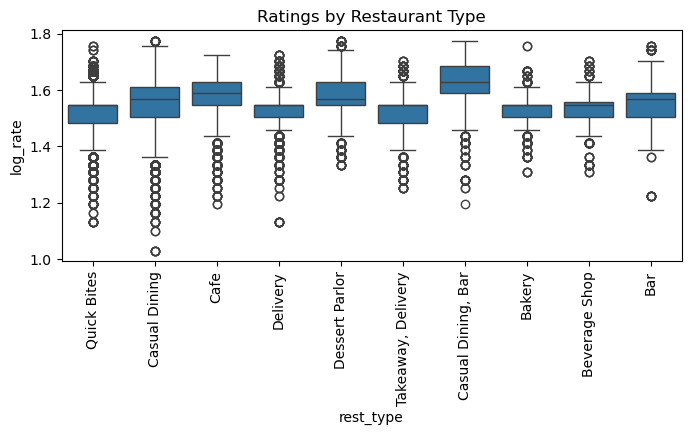

In [218]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='rest_type', y='log_rate', data=df, order=df['rest_type'].value_counts().index[:10])
plt.title('Ratings by Restaurant Type')
plt.xticks(rotation=90)
plt.show()

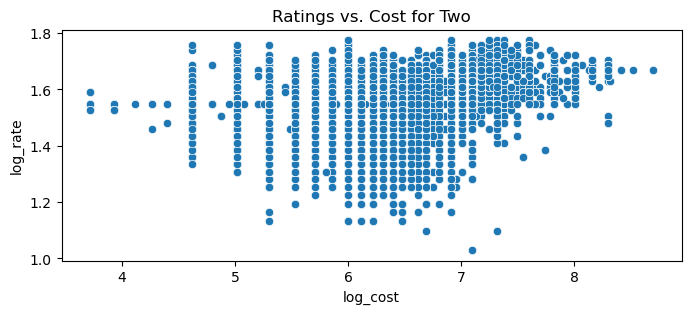

In [220]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='log_cost', y='log_rate', data=df)
plt.title('Ratings vs. Cost for Two')
plt.show()

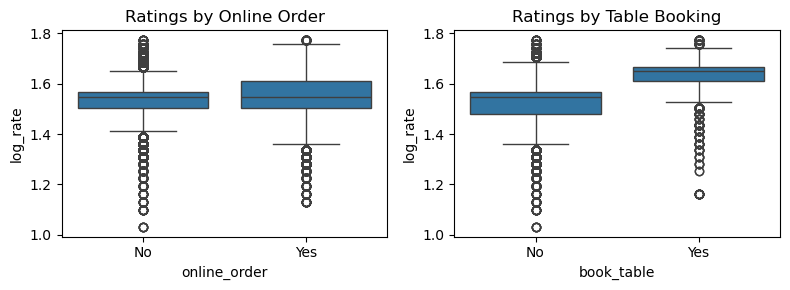

In [222]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x='online_order', y='log_rate', data=df)
plt.title('Ratings by Online Order')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(x='book_table', y='log_rate', data=df)
plt.title('Ratings by Table Booking')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

**Cost vs Other Variables**

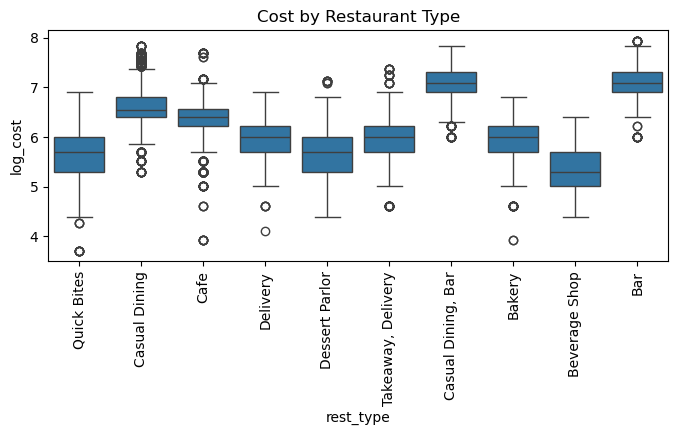

In [226]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='rest_type', y='log_cost', data=df, order=df['rest_type'].value_counts().index[:10])
plt.title('Cost by Restaurant Type')
plt.xticks(rotation=90)
plt.show()

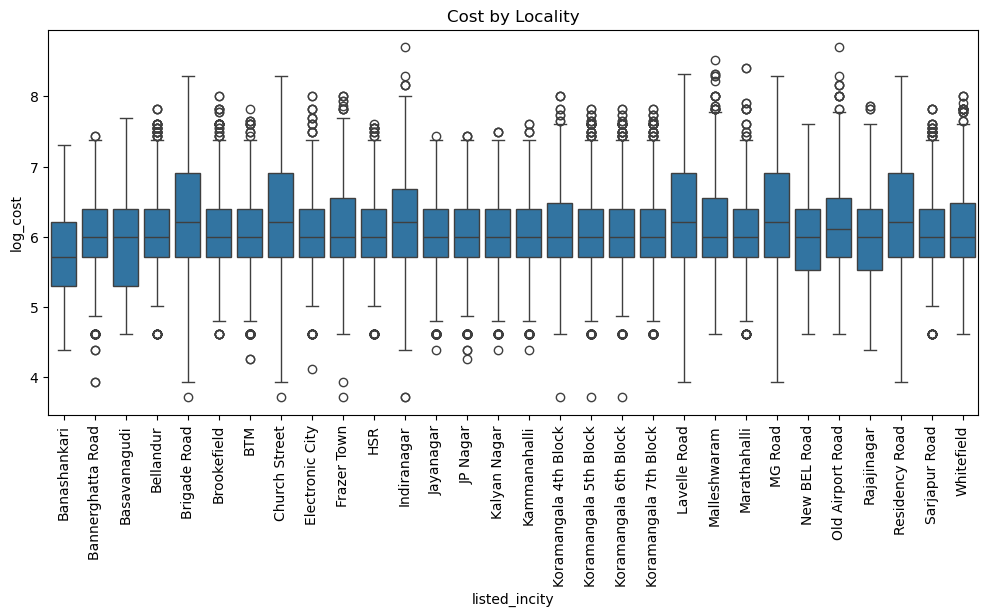

In [228]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='listed_incity', y='log_cost', data=df)
plt.title('Cost by Locality')
plt.xticks(rotation=90)
plt.show()

**Votes vs Rating**

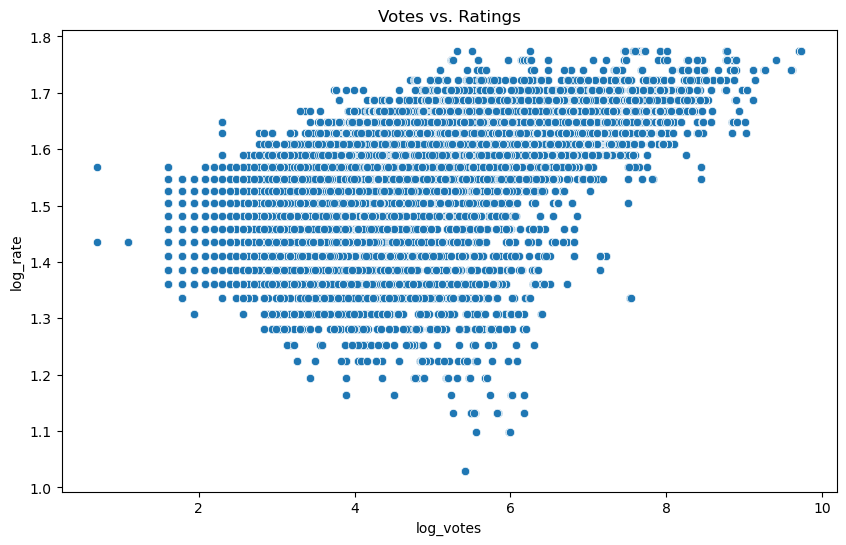

In [230]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_votes', y='log_rate', data=df)
plt.title('Votes vs. Ratings')
plt.show()

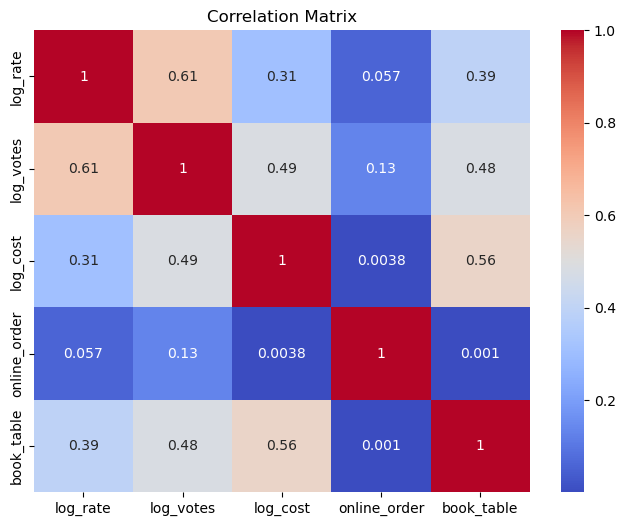

In [232]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['log_rate', 'log_votes', 'log_cost', 'online_order', 'book_table']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [234]:
df = df.drop(['rate', 'votes', 'approx_costfor_two_people'], axis=1)

In [236]:
df

,online_order,book_table,rest_type,dish_liked,cuisines,listed_intype,listed_incity,log_rate,log_votes,log_cost
0,1,1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",Buffet,Banashankari,1.629241,6.654153,6.685861
1,1,0,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",Buffet,Banashankari,1.629241,6.669498,6.685861
2,1,0,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",Buffet,Banashankari,1.568616,6.823286,6.685861
3,0,0,Quick Bites,Masala Dosa,"South Indian, North Indian",Buffet,Banashankari,1.547563,4.488636,5.707110
4,0,0,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",Buffet,Banashankari,1.568616,5.117994,6.398595
...,...,...,...,...,...,...,...,...,...,...
51712,0,0,Bar,Not Available,Continental,Pubs and bars,Whitefield,1.526056,3.332205,7.313887
51713,0,0,Bar,Not Available,Finger Food,Pubs and bars,Whitefield,1.547563,4.304065,6.398595
51714,0,0,Bar,Not Available,Finger Food,Pubs and bars,Whitefield,1.547563,4.304065,7.601402
51715,0,1,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,Pubs and bars,Whitefield,1.667707,5.468060,7.824446


In [240]:
df.to_csv('cleaned.csv', index=False)